# College Reviews Analysis Tool

This notebook performs detailed analysis of college reviews using natural language processing and machine learning techniques. It includes topic modeling, sentiment analysis, and similarity calculations between reviews.

## Setup and Imports
Import required libraries and initialize the analyzer

In [1]:
from remarks_analyzer_class import RemarksAnalyzer
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.decomposition import NMF

In [2]:
# Initialize the analyzer
analyzer = RemarksAnalyzer()


## Dataloading and Processing

In [3]:
# Load reviews
file_path = "data/University Reviews.xlsx"
reviews = analyzer.load_reviews(file_path)

# Group reviews by university
university_reviews = analyzer.group_reviews_by_university(reviews)

# Preprocess reviews
preprocessed_reviews = analyzer.preprocess_reviews(university_reviews)


## Topic Modeling 
Perform topic modeling to identify key themes in the reviews:
- Extract main topics from reviews
- Display top words for each topic

In [4]:

# Perform topic modeling
#topic_probabilities, top_words_per_topic, nmf_model, tfidf_matrix = analyzer.topic_modeling(preprocessed_reviews)
topic_probabilities, top_words_per_topic = analyzer.topic_modeling(preprocessed_reviews)

top_words_per_topic

{'Topic 1': ['program',
  'university',
  'students',
  'professors',
  'school',
  'great',
  'experience',
  'classes',
  'campus',
  'student'],
 'Topic 2': ['college',
  'students',
  'campus',
  'professors',
  'small',
  'liberal',
  'arts',
  'great',
  'school',
  'community'],
 'Topic 3': ['school',
  'get',
  'dont',
  'money',
  'time',
  'job',
  'online',
  'would',
  'going',
  'work'],
 'Topic 4': ['school',
  'good',
  'great',
  'went',
  'back',
  'graduate',
  'wesleyan',
  'small',
  'sports',
  'wartburg']}

## Clustering and Topic distribution
- Add topic probabilities to preprocessed data
- Perform clustering on topic distributions
- Calculate TF-IDF matrix and topic modeling

In [5]:
# Add topic probabilities to data
preprocessed_reviews = pd.concat([preprocessed_reviews, topic_probabilities], axis=1)

# Perform clustering
clusters = analyzer.clustering(topic_probabilities)
preprocessed_reviews['Topic_Cluster'] = clusters


In [6]:
tfidf_vectorizer = TfidfVectorizer()
tfidf_matrix = tfidf_vectorizer.fit_transform(preprocessed_reviews['Cleaned_Review'])
nmf_model = NMF(n_components=4, random_state=42)

top_words_per_topic = pd.DataFrame(list(top_words_per_topic.items()), columns=["Topic Number", "Topic Themes"])
topic_matrix = nmf_model.fit_transform(tfidf_matrix)

topic_matrix_normalized = topic_matrix / topic_matrix.sum(axis=1, keepdims=True)
topic_probabilities = pd.DataFrame(topic_matrix_normalized, columns=[f"Topic {i+1}" for i in range(4)])
university_reviews = pd.concat([university_reviews, topic_probabilities], axis=1)

In [7]:
analyzer.save_to_excel(topic_probabilities,"data/generated/Theme-for-each-cluster.xlsx")
analyzer.save_to_excel(university_reviews,"data/generated/Clustered-Universities.xlsx")

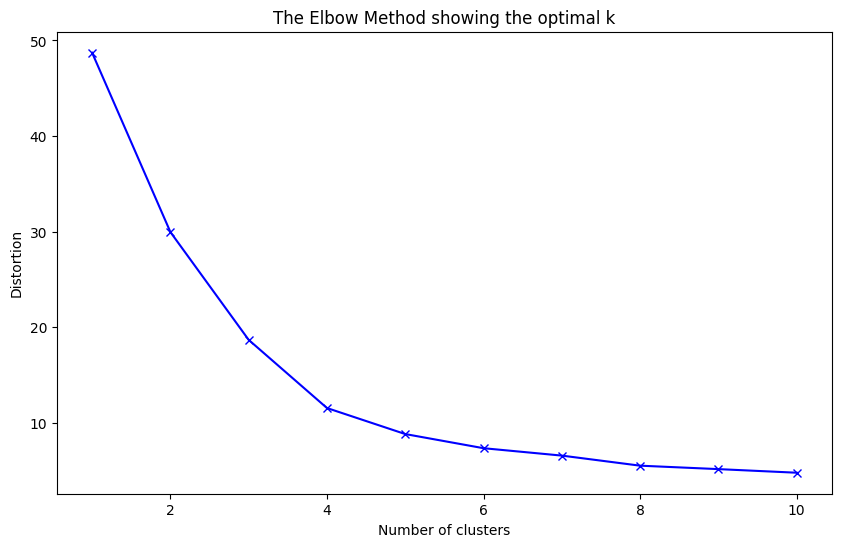

In [8]:
analyzer.visualize_elbow_method(topic_probabilities)

## Sentiment Analysis
- Perform sentiment analysis on reviews
- Separate reviews into positive, negative, and neutral categories
- Calculate similarity between positive and negative reviews

In [9]:
# Perform sentiment analysis
reviews = analyzer.sentiment_analysis(reviews)

# Separate reviews by sentiment
reviews['Cleaned_Review'] = reviews['Review'].apply(analyzer.preprocess_text)
positive_reviews = reviews[reviews['Sentiment_Class'] == 'Positive']
negative_reviews = reviews[reviews['Sentiment_Class'] == 'Negative']
neutral_reviews = reviews[reviews['Sentiment_Class'] == 'Neutral']


In [10]:

# Calculate similarity between positive and negative reviews
similarity_df = analyzer.calculate_similarity(positive_reviews, negative_reviews)

# Save similarity results to Excel
analyzer.save_to_excel(similarity_df, "data/generated/Postive-negative-relationship-of-each-university.xlsx")


## Analysis the Theme Similarity

In [11]:
centroid_similarity_df = analyzer.centroid_sim(reviews)
analyzer.save_to_excel(centroid_similarity_df, "data/generated/Theme-similarity-of-each-cluster.xlsx")
centroid_similarity_df

/Users/rahulankola/Desktop/Rutgers/big_data_algo/Group Project/BDA-Project/.venv/lib/python3.12/site-packages/sklearn/decomposition/_nmf.py:1741: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  warnings.warn(


,Cluster 0,Cluster 1,Cluster 2,Cluster 3
Cluster 0,1.000000,0.369032,0.312851,0.279811
Cluster 1,0.369032,1.000000,0.328812,0.287146
Cluster 2,0.312851,0.328812,1.000000,0.205753
Cluster 3,0.279811,0.287146,0.205753,1.000000
